In [442]:
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics as stat
import scipy.stats as scistat
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [443]:
# Generate selection
def generate_exp():
    return np.round(np.random.exponential(1,25), 3)
selection = generate_exp()
sorted_selection = sorted(selection)

In [444]:
def repeat(arr) -> bool:
    flag = False
    sort_arr = sorted(arr)
    for i in range(0,len(arr)-1):
        if sort_arr[i] == sort_arr[i+1]:
            flag = True
    # if flag == True:
    #     print("Есть повтор элементов")
    # else:
    #     print("Нет повтора")
    return flag

def mode(arr):
    if repeat(arr) == True:
        return stat.mode(arr)
    else:
        return "все числа"

In [445]:
def assym_coef(arr) -> float:
    moment_3 = np.mean((arr-np.mean(arr))**3)
    moment_2 = np.mean((arr-np.mean(arr))**2)
    return moment_3/(moment_2)**(3/2)

## Оценки по выборке

In [446]:
moda = mode(selection)
med = stat.median(selection)
scale = max(selection) - min(selection)
assym_2 = np.round(assym_coef(selection), 3)
print("Оценки по выборке:")
print("Мода = " + str(moda) + '\n' + "Медиана = " + str(med))
print("Размах = " + str(scale))
print("Коэфф ассимметрии = " + str(assym_2))


Оценки по выборке:
Мода = все числа
Медиана = 0.681
Размах = 3.759
Коэфф ассимметрии = 1.835


In [447]:
def find_m(arr,x):
    m = 0
    for j in range(0,len(arr)):
        if arr[j] < x:
            m += 1
    return m

## Эмпирическая функция распределения

([<matplotlib.lines.Line2D at 0x7f43cad8a650>],
 None,
 <matplotlib.collections.FillBetweenPolyCollection at 0x7f43cad897b0>)

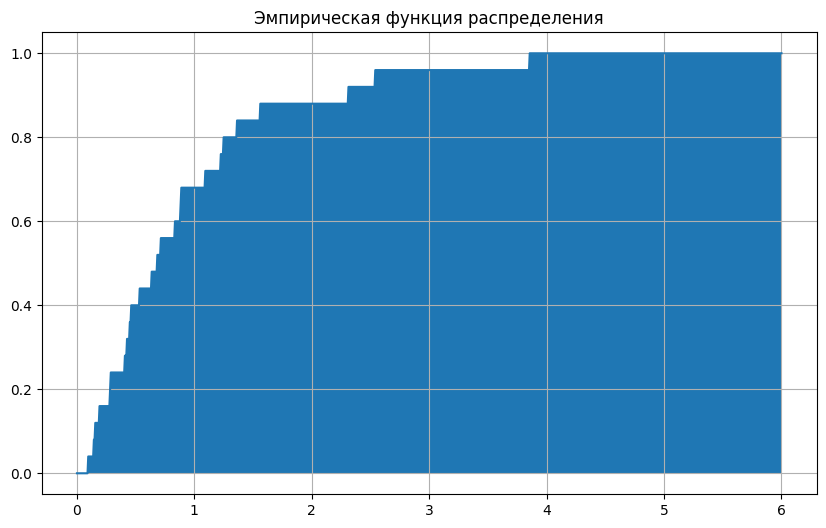

In [448]:
x = np.linspace(0,6,1000)
y = np.array([0.0])
m_curr = 0
for i in range(1,len(x)):
    y = np.append(y, find_m(sorted_selection, x[i]))
y/=len(sorted_selection)
plt.figure(figsize=(10,6))

plt.title("Эмпирическая функция распределения")
plt.plot(x,y), plt.grid(True), plt.fill_between(x,y)


## Гистограмма

Text(0.5, 1.0, 'Гистограмма')

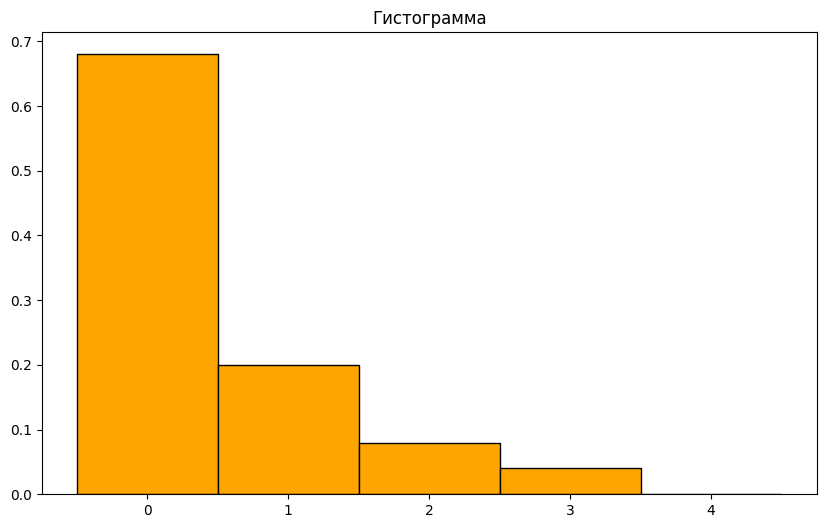

In [449]:
k = 6
delta = scale//k+1
# hist_selec = sorted_selection
x = np.arange(0,k*delta,delta)
scaling_factor = [1/25/delta]
weights = np.ones_like(selection) * scaling_factor
plt.figure(figsize=(10,6))
plt.hist(selection,bins = x, weights = weights, align = "left",color='orange', edgecolor='black')
plt.title("Гистограмма")
# weights

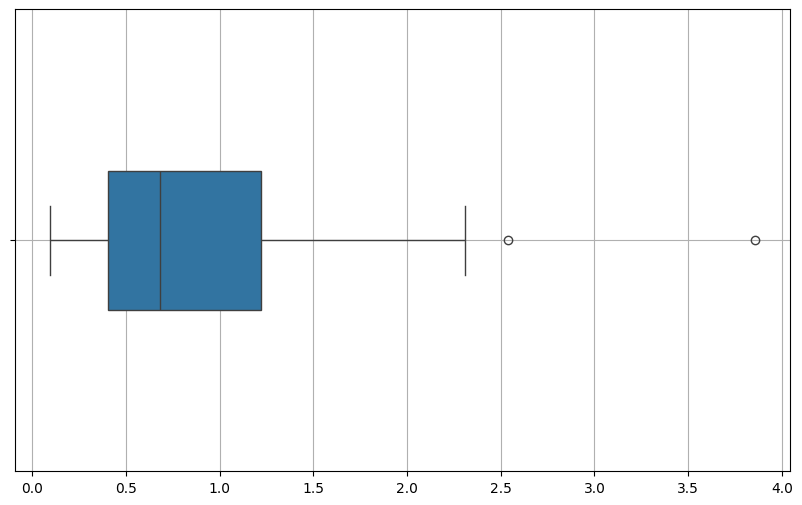

In [450]:
plt.figure(figsize=(10,6))
sns.boxplot(data = selection, orient ='h', width = 0.3)
plt.grid(True)

## Bootstrap среднее значение


Text(0.5, 1.0, 'Распределение коэффициента асимметрии через bootstrap N = 50000')

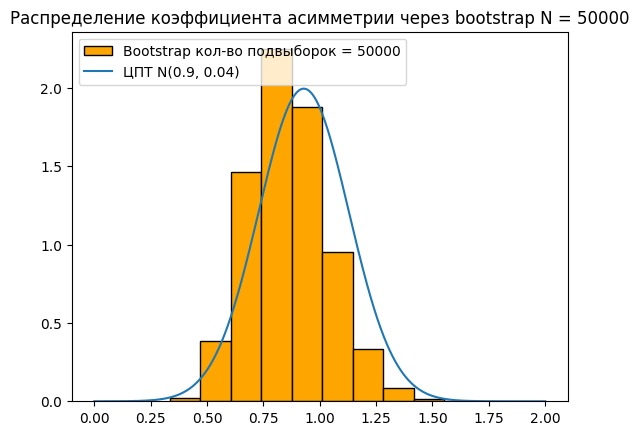

In [451]:
N = 50000
mean_arr = np.array([])
for _ in range(N):
    subselection = np.random.choice(selection, 25)
    mean_arr = np.append(mean_arr, np.mean(subselection))

# k_mean = 11
scale_mean = max(mean_arr) - min(mean_arr)
delta_mean = scale_mean/10



weights = np.ones_like(mean_arr) / N / delta_mean

# plt.figure(figsize = (10,6))
plt.hist(mean_arr, bins = 10, align = "left", weights = weights, color='orange', edgecolor='black', label = f"Bootstrap кол-во подвыборок = {N}")



x = np.linspace(0,2,1000)
y = 1/math.sqrt(2*math.pi*0.04)*np.exp((-1)*(x-np.mean(selection))**2/2/0.04)

plt.plot(x,y, label = f"ЦПТ N({np.round(np.mean(selection),1)}, 0.04)")
plt.legend(loc = "upper left")
np.mean(selection)
plt.title(f"Распределение коэффициента асимметрии через bootstrap N = {N}")

## Bootstrap коээфициент асимметрии


Вероятность, что коэффициент асимметрии меньше чем 1 = 0.13896


Text(0.5, 1.0, 'Распределение коэффициента асимметрии через bootstrap N = 50000')

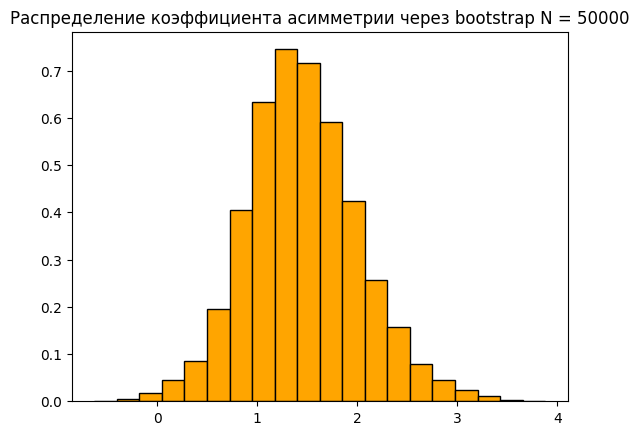

In [452]:
N = 50000
assym_arr = np.array([])
for _ in range(N):
    subselection = np.random.choice(selection, 25)
    assym_arr = np.append(assym_arr, assym_coef(subselection))

scale_assym = max(assym_arr) - min(assym_arr)
delta_assym = scale_assym/20



weights = np.ones_like(assym_arr) / N / delta_assym


plt.hist(assym_arr, bins = 20, align = "left", weights = weights, color='orange', edgecolor='black', label = f"Bootstrap N = {N}")
count = 0
for i in range(len(assym_arr)):
    if assym_arr[i] < 1: count+=1
probability_lower_than_one = count/len(assym_arr)
print(f"Вероятность, что коэффициент асимметрии меньше чем 1 = {probability_lower_than_one}")
plt.title(f"Распределение коэффициента асимметрии через bootstrap N = {N}")

Text(0.5, 1.0, 'Распределение медианы через bootstrap N = 50000')

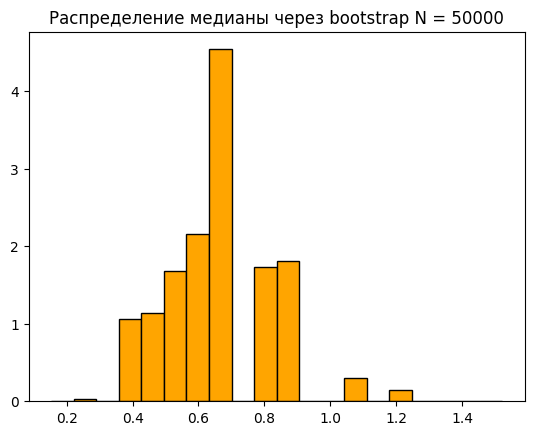

In [453]:
N = 50000
median_arr = np.array([])
for _ in range(N):
    subselection = np.random.choice(selection, 25)
    median_arr = np.append(median_arr, stat.median(subselection))

scale_median = max(median_arr) - min(median_arr)
delta_median = scale_median/20



weights = np.ones_like(median_arr) / N / delta_median


plt.hist(median_arr, bins = 20, align = "left", weights = weights, color='orange', edgecolor='black', label = f"Bootstrap N = {N}")
plt.title(f"Распределение медианы через bootstrap N = {N}")